In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

In [4]:
ACO_participants_df = pd.read_csv('SSP_ACO_Participants_2022_01_01.csv')

In [5]:
ACO_participants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16046 entries, 0 to 16045
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   aco_id                        16046 non-null  object
 1   par_lbn                       16046 non-null  object
 2   aco_name                      16046 non-null  object
 3   aco_service_area              16046 non-null  object
 4   agreement_period_num          16046 non-null  int64 
 5   initial_start_date            16046 non-null  object
 6   current_start_date            16046 non-null  object
 7   re-entering_aco               16046 non-null  int64 
 8   basic_track                   16046 non-null  int64 
 9   basic_track_level             9803 non-null   object
 10  enhanced_track                16046 non-null  int64 
 11  high_revenue_aco              16046 non-null  int64 
 12  low_revenue_aco               16046 non-null  int64 
 13  adv_pay         

In [6]:
ACO_participants_df = ACO_participants_df.drop(['aco_name', 'aco_address', 'aco_public_reporting_website', 'aco_exec_name', 
                          'aco_exec_email', 'aco_public_phone', 'aco_exec_phone',
                          'aco_public_name', 'aco_public_email', 'aco_public_phone', 
                          'aco_compliance_contact_name', 'aco_medical_director_name'], axis = 1)

In [7]:
ACO_participants_df.head()

,aco_id,par_lbn,aco_service_area,agreement_period_num,initial_start_date,current_start_date,re-entering_aco,basic_track,basic_track_level,enhanced_track,high_revenue_aco,low_revenue_aco,adv_pay,aim,snf_3-day_rule_waiver,prospective_assignment,retrospective_assignment
0,A4807,ABBAS HASNAIN,CA,1,1/1/2020,1/1/2020,0,1,B,0,0,1,0,0,0,0,1
1,A4807,ARMEN H BEDROSIAN MD INC,CA,1,1/1/2020,1/1/2020,0,1,B,0,0,1,0,0,0,0,1
2,A4807,DAN D HOPNER MD ROMULO M ROMERO PA,CA,1,1/1/2020,1/1/2020,0,1,B,0,0,1,0,0,0,0,1
3,A4807,DEREK NGUYEN MD INC,CA,1,1/1/2020,1/1/2020,0,1,B,0,0,1,0,0,0,0,1
4,A4807,ERIC TATE,CA,1,1/1/2020,1/1/2020,0,1,B,0,0,1,0,0,0,0,1


In [8]:
ACO_participants_df['initial_start_date'] = pd.to_datetime(ACO_participants_df['initial_start_date'])

In [9]:
ACO_participants_df['current_start_date'] = pd.to_datetime(ACO_participants_df['current_start_date'])

In [10]:
ACO_participants_df['current_start_date'].unique()

array(['2020-01-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [11]:
ACO_participants_df['initial_start_date'].unique()

array(['2020-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2022-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2012-07-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [12]:
ACO_participants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16046 entries, 0 to 16045
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   aco_id                    16046 non-null  object        
 1   par_lbn                   16046 non-null  object        
 2   aco_service_area          16046 non-null  object        
 3   agreement_period_num      16046 non-null  int64         
 4   initial_start_date        16046 non-null  datetime64[ns]
 5   current_start_date        16046 non-null  datetime64[ns]
 6   re-entering_aco           16046 non-null  int64         
 7   basic_track               16046 non-null  int64         
 8   basic_track_level         9803 non-null   object        
 9   enhanced_track            16046 non-null  int64         
 10  high_revenue_aco          16046 non-null  int64         
 11  low_revenue_aco           16046 non-null  int64         
 12  adv_pay           

In [13]:
ACO_participants_df['basic_track_level'].value_counts()

B    4716
E    3168
A     702
C     683
D     534
Name: basic_track_level, dtype: int64

In [14]:
ACO_df = pd.read_csv('../Accountable Care Organizations/SSP_ACOs_2022_01_01.csv')

In [15]:
ACO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   aco_id                        483 non-null    object 
 1   aco_name                      483 non-null    object 
 2   aco_service_area              483 non-null    object 
 3   agreement_period_num          483 non-null    int64  
 4   initial_start_date            483 non-null    object 
 5   current_start_date            483 non-null    object 
 6   re-entering_aco               483 non-null    int64  
 7   basic_track                   483 non-null    int64  
 8   basic_track_level             337 non-null    object 
 9   enhanced_track                483 non-null    int64  
 10  high_revenue_aco              483 non-null    int64  
 11  low_revenue_aco               483 non-null    int64  
 12  adv_pay                       483 non-null    int64  
 13  aim  

In [16]:
ACO_df = ACO_df.drop(['aco_name', 'aco_address', 'aco_public_reporting_website', 'aco_exec_name', 
                          'aco_exec_email', 'aco_public_phone', 'aco_exec_phone',
                          'aco_public_name', 'aco_public_email', 'aco_public_phone', 
                          'aco_compliance_contact_name', 'aco_medical_director_name'], axis = 1)

In [17]:
ACO_df.head()

,aco_id,aco_service_area,agreement_period_num,initial_start_date,current_start_date,re-entering_aco,basic_track,basic_track_level,enhanced_track,high_revenue_aco,low_revenue_aco,adv_pay,aim,snf_3-day_rule_waiver,prospective_assignment,retrospective_assignment,lat,long
0,A4807,CA,1,1/1/2020,1/1/2020,0,1,B,0,0,1,0,0,0,0,1,33.882189,-117.934008
1,A2811,AZ,2,1/1/2016,7/1/2019,0,1,D,0,0,1,0,0,0,0,1,32.222734,-110.884606
2,A3762,AL,2,1/1/2018,1/1/2022,0,1,B,0,0,1,0,0,0,0,1,33.516703,-86.809646
3,A5098,"NY, PA",1,1/1/2022,1/1/2022,0,1,A,0,0,1,0,0,0,0,1,28.032863,-82.548832
4,A1596,GA,3,1/1/2013,7/1/2019,0,1,E,0,0,1,0,0,0,0,1,29.724900,-95.456910


In [141]:
df_rev = ACO_df[['basic_track_level', 'high_revenue_aco', 'low_revenue_aco']]

In [142]:
df_rev.fillna('Enhanced', inplace=True)

In [147]:
df_rev.head(20)

,basic_track_level,high_revenue_aco,low_revenue_aco
0,B,0,1
1,D,0,1
2,B,0,1
3,A,0,1
4,E,0,1
5,D,0,1
6,E,0,1
7,E,0,1
8,B,1,0
9,E,0,1


In [143]:
df_rev_counts = df_rev.groupby(['basic_track_level', 'high_revenue_aco']).size()

In [148]:
df_rev_counts.head(20)

basic_track_level  high_revenue_aco
A                  0                   13
                   1                   16
B                  0                   72
                   1                   98
C                  0                   19
                   1                    6
D                  0                   13
                   1                    2
E                  0                   75
                   1                   23
Enhanced           0                   77
                   1                   69
dtype: int64

In [18]:
ACO_df['initial_start_date'] = pd.to_datetime(ACO_df['initial_start_date'])

In [19]:
ACO_df['current_start_date'] = pd.to_datetime(ACO_df['current_start_date'])

In [20]:
ACO_df['initial_start_date'] = ACO_df['initial_start_date'].dt.year

In [21]:
ACO_df['current_start_date'] = ACO_df['current_start_date'].dt.year

In [22]:
df2 = ACO_df.groupby('initial_start_date')['basic_track_level'].value_counts()

In [23]:
dfbasic_trac = ACO_df[['initial_start_date', 'basic_track_level']]

In [24]:
dfbasic_trac.fillna('Enhanced', inplace=True)

In [25]:
dfbasic_trac_counts = dfbasic_trac.groupby(['initial_start_date','basic_track_level']).size()

In [26]:
time_series_data= dfbasic_trac_counts.to_frame().reset_index()

In [27]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   initial_start_date  50 non-null     int64 
 1   basic_track_level   50 non-null     object
 2   0                   50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [28]:
df = time_series_data.rename(columns= {0: 'count'})

In [29]:
df

,initial_start_date,basic_track_level,count
0,2012,B,6
1,2012,C,3
2,2012,D,3
3,2012,E,13
4,2012,Enhanced,13
5,2013,B,7
6,2013,C,3
7,2013,D,1
8,2013,E,7
9,2013,Enhanced,11


In [30]:
df['cumsum'] = df.groupby(['basic_track_level'])['count'].apply(lambda x: x.cumsum())


In [31]:
df

,initial_start_date,basic_track_level,count,cumsum
0,2012,B,6,6
1,2012,C,3,3
2,2012,D,3,3
3,2012,E,13,13
4,2012,Enhanced,13,13
5,2013,B,7,13
6,2013,C,3,6
7,2013,D,1,4
8,2013,E,7,20
9,2013,Enhanced,11,24


In [32]:
import plotly.express as px

In [230]:
fig = px.line(df, x="initial_start_date", y="cumsum", color='basic_track_level')

fig.update_layout(
    title='ACO Enrollment', title_x=0.5,
    xaxis_title='date',
    yaxis_title='No. of ACOs')
fig.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   initial_start_date  50 non-null     int64 
 1   basic_track_level   50 non-null     object
 2   count               50 non-null     int64 
 3   cumsum              50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [35]:
df3 = df.groupby('basic_track_level')['count'].sum()

In [36]:
df3.head()

basic_track_level
A     29
B    170
C     25
D     15
E     98
Name: count, dtype: int64

In [37]:
px.bar(df3, y='basic_track_level')

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['count'] but received: basic_track_level

In [38]:
df.head()

,initial_start_date,basic_track_level,count,cumsum
0,2012,B,6,6
1,2012,C,3,3
2,2012,D,3,3
3,2012,E,13,13
4,2012,Enhanced,13,13


In [39]:
df3= pd.DataFrame(df3)
df3.reset_index(drop=True, inplace=True)
df3

# df3.columns = ["basic_track_level", "Count"]
# df3

,count
0,29
1,170
2,25
3,15
4,98
5,146


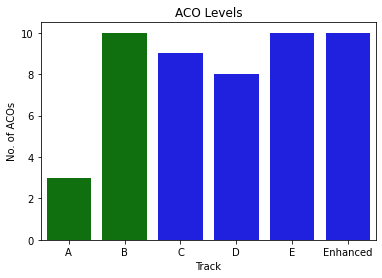

In [40]:

sns.countplot(x="basic_track_level", data= df, order = ["A", "B", "C", "D", "E", "Enhanced"], palette = {'A': 'green', 'B': 'green', 'C': 'blue', 'D': 'blue', 'E': 'blue', 'Enhanced':'blue'});
plt.title('ACO Levels')
plt.xlabel('Track')
plt.ylabel('No. of ACOs')
#clrs = ['grey' if (x == 'A') else 'red' for x in values ]
#sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)
#plt.xticks(rotation=-45)
palette = {'A': 'green', 'B': 'green', 'C': 'blue', 'D': 'blue', 'E': 'blue', 'Enhanced':'blue'}


plt.savefig('ACO_tracks')
plt.show()

In [41]:
time_series.head()

NameError: name 'time_series' is not defined

In [42]:
time_series['basic_track_level']

NameError: name 'time_series' is not defined

In [43]:
dfbasic_trac_counts = dfbasic_trac.groupby(['initial_start_date','basic_track_level']).size()

In [44]:
table = pd.pivot_table(df, values ='A', index =['B', 'C'],
                         columns =['B'], aggfunc = np.sum)

KeyError: 'A'

In [45]:
df2

initial_start_date  basic_track_level
2012                E                    13
                    B                     6
                    C                     3
                    D                     3
2013                B                     7
                    E                     7
                    C                     3
                    D                     1
2014                B                    14
                    E                    10
                    C                     5
                    D                     3
2015                B                    22
                    E                     3
                    C                     2
2016                B                    12
                    E                    10
                    D                     2
2017                B                    21
                    E                    11
                    D                     3
                    C                 

In [46]:
df3 = ACO_df.groupby('initial_start_date')['enhanced_track'].sum()

In [47]:
df3

initial_start_date
2012    13
2013    11
2014    14
2015    16
2016    11
2017    17
2018    15
2019    15
2020    12
2022    22
Name: enhanced_track, dtype: int64

In [48]:
df_enhanced = ACO_df.groupby('current_start_date')['enhanced_track'].sum()

In [49]:
df_basic = ACO_df.groupby('current_start_date')['basic_track'].sum()

In [50]:
df_basic

current_start_date
2019    112
2020     97
2022    128
Name: basic_track, dtype: int64

In [51]:
df_enhanced

current_start_date
2019    47
2020    21
2022    78
Name: enhanced_track, dtype: int64

In [52]:
ACO_df['re-entering_aco'].value_counts()

0    420
1     63
Name: re-entering_aco, dtype: int64

In [53]:
df_reentering = ACO_df.groupby('current_start_date')['re-entering_aco'].sum()

In [54]:
df_reentering

current_start_date
2019    18
2020    14
2022    31
Name: re-entering_aco, dtype: int64

In [55]:
plt.bar(data= df_reentering, color ='maroon',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("No. of ACOs")
plt.title("Re-entering ACOs")
plt.show()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

In [56]:
ACO_df['enhanced_track'].value_counts()

0    337
1    146
Name: enhanced_track, dtype: int64

In [57]:
ACO_composition_df = pd.read_excel('ACO_participant_composition.xlsx')

In [58]:
ACO_composition_df.head()

,Participant,number
0,Participant TINs,16013
1,Physicians and non-Physicians,528966
2,Hospitals,1353
3,Federally Qualified Health Centers,3708
4,Rural Health Centers,1643


In [135]:
ACO_composition_df.rename(columns = {
                                    'number':'Number of Participants'}, inplace = True)

In [229]:
import plotly.express as px


fig = px.bar(ACO_composition_df, x="Participant", y='Number of Participants', text_auto=True)
fig.update_layout(title_text='ACO Participant Composition', title_x=0.5)
fig.update_traces(marker_color='rgb(26, 118, 255)',  textposition='outside')
fig.show()

In [231]:
ACO_risk_level_df = pd.read_excel('ACO_risk level.xlsx')

In [232]:
ACO_risk_level_df.rename(columns = {'ACO tracks':'Risk',
                                    'ACOs':'Number of ACOs'}, inplace = True)

In [233]:
ACO_risk_level_df.rename(columns = {'Percent':'ACOs (%)'}, inplace = True)

In [234]:
ACO_risk_level_df.head()

,Risk,Number of ACOs,ACO(%),Total Savings,Total Savings (Billions),Savings(%)
0,One Sided,199,41,1878763034,1.878763,45.326665
1,Two Sided,284,59,2266176881,2.266177,54.673335


In [228]:

fig = px.bar(ACO_risk_level_df, x="Risk", y='ACOs (%)')
fig.update_layout(title_text='ACO Risk Models', title_x=0.5)
fig.update_traces(marker_color='rgb(26, 118, 255)', width = [0.4, 0.4])
fig.show()

In [238]:
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='ACO %', x=ACO_risk_level_df['Risk'], y=ACO_risk_level_df['ACO(%)'], marker_color='rgb(26, 118, 255)'),
    go.Bar(name='Total Savings %', x=ACO_risk_level_df['Risk'], y=ACO_risk_level_df['Savings(%)'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='ACO Risk Models', title_x=0.5)
fig.update_yaxes(title_text="%")
fig.show()

In [260]:
losslevel_df = pd.read_excel('Book7.xlsx')


In [261]:
losslevel_df

,Type,Savings,Loss,Savings %,Loss %
0,ACO,425,88,0.82846,0.17154


In [264]:
import plotly.graph_objects as go
Savings=['Loss', 'Savings']

fig = go.Figure([go.Bar(x=Savings, y=[17, 82])])
fig.update_layout(title_text='Loss/Savings', title_x=0.5)
fig.update_yaxes(title_text="%")
fig.show()

In [ ]:
fig = px.bar(losslevel_df, x="Type", y='ACOs (%)')
fig.update_layout(title_text='ACO Risk Models', title_x=0.5)
fig.update_traces(marker_color='rgb(26, 118, 255)', width = [0.4, 0.4])
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='ACO %', x=losslevel_df['Risk], y=ACO_risk_level_df['ACO(%)'], marker_color='rgb(26, 118, 255)'),
    go.Bar(name='Total Savings %', x=ACO_risk_level_df['Risk'], y=ACO_risk_level_df['Savings(%)'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='ACO Risk Models', title_x=0.5)
fig.update_yaxes(title_text="%")
fig.show()

In [69]:
assigned_beneficiries_df = pd.read_excel('Assigned_beneficiries.xls')

In [178]:
assigned_beneficiries_df.head()

,Year,ACO,Assigned Beneficiaries (millions)
0,2022,483,11.0
1,2021,477,10.7
2,2020,517,11.2
3,2019,487,10.4
4,2018,561,10.5


In [227]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=assigned_beneficiries_df['Year'], y=assigned_beneficiries_df['ACO'], name="ACOs", mode="lines"),
    secondary_y=True
)
fig.update_traces(line_color='indianred', line_width=4.5)

fig.add_trace(
    go.Bar(x=assigned_beneficiries_df['Year'], y=assigned_beneficiries_df['Assigned Beneficiaries (millions)'], name="Assigned Beneficiaries (millions)"),
    secondary_y=False
)
fig.update_traces(marker_color='rgb(26, 118, 255)')

fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Assigned Beneficiaries (millions)", secondary_y=False)
fig.update_yaxes(title_text="ACOs", secondary_y=True)
fig.update_layout(title_text='MSSP Total ACOs and Assigned Beneficiaries', title_x=0.5)

fig.show()

In [171]:
fig = px.bar(assigned_beneficiries_df, x="Year", y="Assigned Beneficiaries (millions)", text_auto=True)
fig.update_layout(title_text='MSSP Assigned Beneficiaries')
fig.update_traces(marker_color='rgb(26, 118, 255)',  textposition='outside')
fig.show()

In [71]:
Beneficiary_df = pd.read_excel('Beneficiary Demograph.xlsx')

In [72]:
Beneficiary_df.head()

,Enrollment type,Beneficiary Person,Percent
0,Age None-Dual,9048056,84
1,Disabled,1032983,9
2,Aged Dual,646646,6
3,End Stage Renal Disease,62162,1


In [ ]:
fig = px.bar(Beneficiary_df, x="Year", y="Assigned Beneficiaries (millions)", text_auto=True)
fig.show()

In [73]:
Revenue_df = pd.read_excel('Revenue.xlsx')

In [74]:
Revenue_df.head()

,Revenue,ACO,Percent
0,High Revenue,214,44
1,Low Revenue,269,56


In [76]:
shared_savings_df = pd.read_csv('shared savings.csv')

In [120]:
shared_savings_df.rename(columns = {'Total Earned Shared Savings (million)':'Total Earned Shared Savings ($ million)',
                                    'Quality score(%)':'Overall Quality score(%)'}, inplace = True)

In [121]:
shared_savings_df.head(10)

,Year,Overall Quality score(%),Total Earned Shared Savings ($ million)
0,2020,97,2300
1,2019,92,1500
2,2018,93,983
3,2017,92,799
4,2016,95,700
5,2015,91,645
6,2014,83,341
7,2013,95,315


In [226]:
fig = px.bar(shared_savings_df, x="Year", y='Total Earned Shared Savings ($ million)', text_auto=True)
fig.update_layout(title_text='ACO Performance', title_x=0.5)
fig.update_traces(marker_color='rgb(26, 118, 255)',  textposition='outside')
fig.show()

In [151]:
aco_tracks_df = pd.read_excel('ACOTracks.xlsx')

In [152]:
aco_tracks_df.head(10)

,Type,Risk,ACO Track,Count,Low Revenue,High Revenue
0,Basic Track,One Sided,A,29,13,16
1,Basic Track,One Sided,B,170,72,98
2,Basic Track,Two Sided,C,25,19,6
3,Basic Track,Two Sided,D,15,13,2
4,Basic Track,Two Sided,E,98,75,23
5,Track,Two Sided,Enhanced,146,77,69


In [225]:
import plotly.graph_objects as go
x = [
    aco_tracks_df['Type'],
    aco_tracks_df['ACO Track']
]
fig = go.Figure()
fig.add_bar(x=x,y=aco_tracks_df['Low Revenue'], name='Low Revenue',
                marker_color='rgb(55, 83, 109)')
fig.add_bar(x=x,y=aco_tracks_df['High Revenue'], name='High Revenue',
                marker_color= 'rgb(26, 118, 255)')
fig.update_layout(barmode="relative")
fig.update_layout(title_text='ACO Tracks', title_x=0.5)
fig.update_yaxes(title_text="ACOs")
fig.show()

In [163]:
import plotly.graph_objects as go
x = [
    aco_tracks_df['Type'],
    aco_tracks_df['ACO Track']
]
fig = go.Figure()
fig.add_bar(x=x,y=aco_tracks_df['Count'])
fig.update_layout(title_text='ACO Tracks')
fig.update_layout(title_text='ACO Tracks')
fig.update_traces(marker_color='rgb(26, 118, 255)')
fig.show()

In [201]:
performance_df = pd.read_csv('Performance_Year_Financial_and_Quality_Results_PUF_2020_01_01.csv')

In [202]:
performance_df.head()

,ACO_ID,ACO_Name,ACO_State,Agree_Type,Agreement_Period_Num,Initial_Start_Date,Current_Start_Date,Current_Track_1,Current_Track_2,Current_Track_3,...,ACO13,ACO14,ACO17,ACO18,ACO19,ACO20,ACO42,ACO40,ACO27,ACO28
0,A1001,Palm Beach Accountable Care Organization,FL,Renewal,3,7/1/2012,7/1/2019,0,0,0,...,91.19,90.12,94.87,86.08,87.15,90.08,93.93,42.86,6.83,92.03
1,A1006,Hackensack Alliance ACO,"NJ, NY",Renewal,3,4/1/2012,7/1/2019,0,0,0,...,92.6,80,100,79.86,76,76.89,87.18,14.29,8.53,80.09
2,A1023,"Arizona Connected Care, LLC",AZ,Renewal,3,4/1/2012,7/1/2019,0,0,0,...,68.93,71.63,75.27,67.49,58.22,72.09,76.85,2.44,21.68,62.94
3,A1026,Atlantic ACO,NJ,Renewal,3,4/1/2012,7/1/2019,0,0,0,...,70.25,85,70.37,56.54,85.06,80.82,80.26,3.39,17.9,72.82
4,A1027,"Florida Physicians Trust, LLC",FL,Renewal,3,4/1/2012,7/1/2019,0,0,0,...,90.36,81.36,93.44,75.84,83.86,81.18,87.21,20.41,17.35,83.6


In [203]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Columns: 162 entries, ACO_ID to ACO28
dtypes: float64(26), int64(106), object(30)
memory usage: 649.4+ KB


In [239]:
pdf = performance_df[['ACO_ID', 'Risk_Model', 'Adv_Pay', 'AIM', 'Sav_rate', 'N_AB', 'BnchmkMinExp','MinSavPerc', 
                     'GenSaveLoss', 'EarnSaveLoss', 'Met_QPS', 'QualScore', 'ABtotBnchmk','ABtotExp']]

In [240]:
pdf.head()


,ACO_ID,Risk_Model,Adv_Pay,AIM,Sav_rate,N_AB,BnchmkMinExp,MinSavPerc,GenSaveLoss,EarnSaveLoss,Met_QPS,QualScore,ABtotBnchmk,ABtotExp
0,A1001,Two-Sided,0,0,0.0757,80864,72427998,0.0200,72427998,54320998,1,100.00,956864945,884436947
1,A1006,One-Sided,0,0,-0.0050,33798,-1917725,0.0236,0,0,1,97.81,383064284,384982008
2,A1023,One-Sided,0,0,-0.0204,10146,-1816209,0.0299,0,0,1,96.87,89013515,90829724
3,A1026,Two-Sided,0,0,0.0240,37348,9463053,0.0233,9463053,4598452,1,97.19,394704803,385241750
4,A1027,Two-Sided,0,0,0.0401,13205,6802992,0.0281,6802992,3327088,1,97.81,169667165,162864173


In [247]:
pdf_risk_savings_df = pdf[['Risk_Model', 'BnchmkMinExp']]



In [254]:
pf = pdf_risk_savings_df[pdf_risk_savings_df['BnchmkMinExp']<0]

In [253]:
p = pdf_risk_savings_df[pdf_risk_savings_df['BnchmkMinExp']>0]

In [256]:
p

,Risk_Model,BnchmkMinExp
0,Two-Sided,72427998
3,Two-Sided,9463053
4,Two-Sided,6802992
5,One-Sided,6728881
6,Two-Sided,77622055
...,...,...
507,One-Sided,3001468
508,One-Sided,946034
509,Two-Sided,8214495
510,One-Sided,2531185


In [255]:
pf

,Risk_Model,BnchmkMinExp
1,One-Sided,-1917725
2,One-Sided,-1816209
42,One-Sided,-4484882
88,One-Sided,-1843945
124,One-Sided,-6568032
...,...,...
463,One-Sided,-1869234
464,One-Sided,-1280504
484,One-Sided,-2967230
499,One-Sided,-1129125


In [242]:
pdf_risk_Q_df = pdf[['Risk_Model', 'Met_QPS', 'QualScore']]

In [243]:
Q_counts = pdf_risk_Q_df.groupby(['Risk_Model', 'Met_QPS']).size()

In [246]:
pdf_risk_Q_df['Met_QPS'].value_counts()

1    513
Name: Met_QPS, dtype: int64

In [244]:
Q_counts

Risk_Model  Met_QPS
One-Sided   1          323
Two-Sided   1          190
dtype: int64

In [ ]:
pdf_risk_savings = pdf_risk_savings_df.groupby('Risk_Model').sum()

In [222]:

pdf_risk_savings = pdf_risk_savings_df.groupby('Risk_Model').sum()

In [223]:
pdf_risk_savings.head(10)

,BnchmkMinExp
Risk_Model,
One-Sided,1878763034
Two-Sided,2266176881


In [ ]:

df['tags']='' # to create an empty column

for col_name in df.columns:
    df.ix[df[col_name]==1,'tags']= df['tags']+' '+col_name

print df